In [3]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt




In [5]:
# Read the Excel file
df = pd.read_csv("Loan_Data/cleaned_and_normalized_data.csv")
X=df.drop(columns='Default_status',axis=1)
y=df['Default_status']





In [6]:
X.info(),y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 39 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   sector_AGRICULTURE                                827 non-null    float64
 1   sector_EDUCATION                                  827 non-null    float64
 2   sector_GENERAL                                    827 non-null    float64
 3   sector_GENERAL COMMERCE                           827 non-null    float64
 4   sector_VALUE CHAIN                                827 non-null    float64
 5   PRODUCT_GROUP_NAME_Corporate Loans Group          827 non-null    float64
 6   PRODUCT_GROUP_NAME_Current Accounts Group         827 non-null    float64
 7   PRODUCT_GROUP_NAME_HRM Loans Group                827 non-null    float64
 8   PRODUCT_GROUP_NAME_Retail Loans Individual Group  827 non-null    float64
 9   PRODUCT_GROUP_NAME_Sm

(None, None)

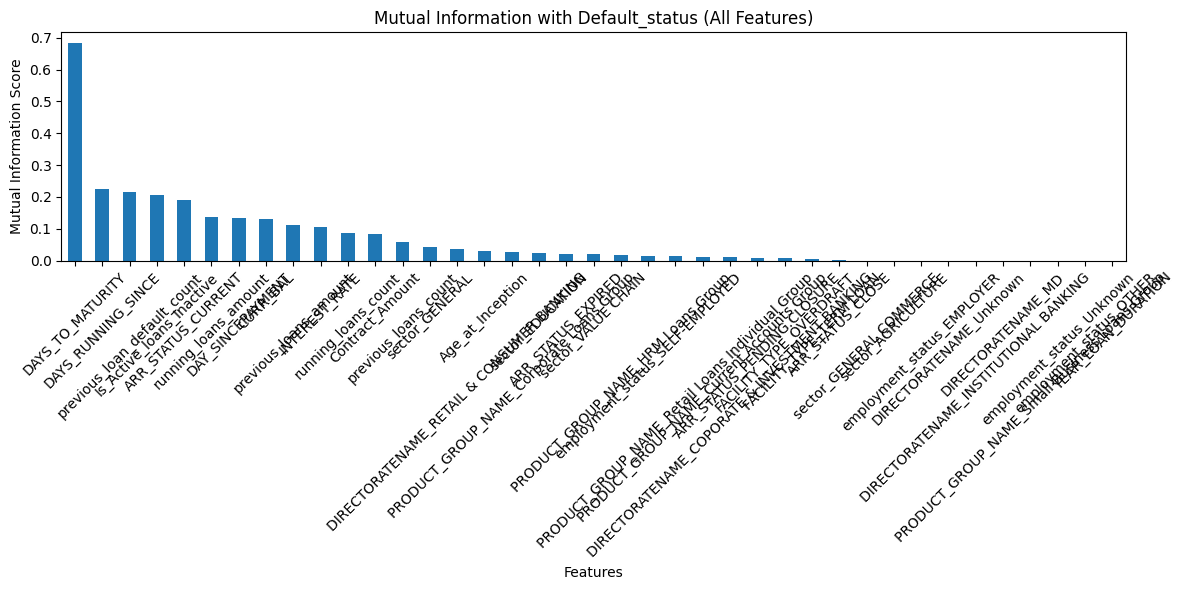

In [7]:
# Mutual Information
mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)

# Plot Mutual Information
plt.figure(figsize=(12, 6))
mi_series.plot(kind="bar")
plt.title("Mutual Information with Default_status (All Features)")
plt.xlabel("Features")
plt.ylabel("Mutual Information Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



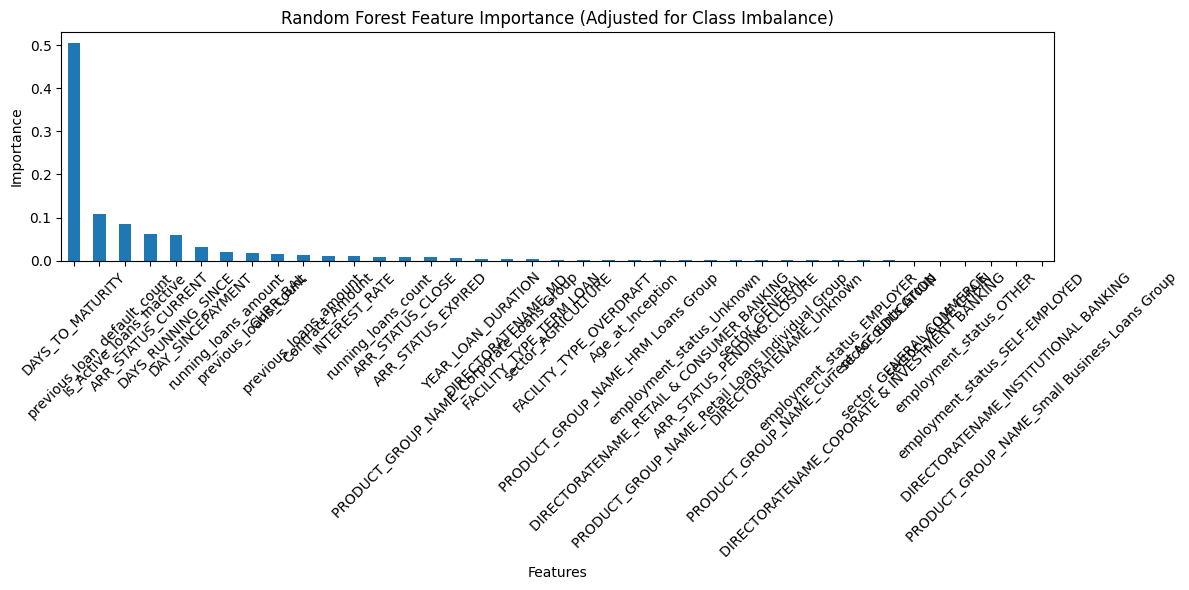

In [8]:

# Random Forest Feature Importance - HANDLING IMBALANCE
rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100) # Key change here
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot Random Forest Importance
plt.figure(figsize=(12, 6))
importances.plot(kind="bar")
plt.title("Random Forest Feature Importance (Adjusted for Class Imbalance)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [ ]:
# Compare the top features from both methods

mi_series.head(10),



DAYS_TO_MATURITY               0.683010
DAYS_RUNNING_SINCE             0.224265
previous_loan_default_count    0.215693
Is_Active_loans_Inactive       0.206523
ARR_STATUS_CURRENT             0.189817
running_loans_amount           0.136257
DAY_SINCEPAYMENT               0.133722
CURR_BAL                       0.131600
previous_loans_amount          0.113153
INTEREST_RATE                  0.104287
dtype: float64

In [11]:

importances.head(10)

DAYS_TO_MATURITY               0.504644
previous_loan_default_count    0.108420
Is_Active_loans_Inactive       0.085799
ARR_STATUS_CURRENT             0.061124
DAYS_RUNNING_SINCE             0.060493
DAY_SINCEPAYMENT               0.032624
running_loans_amount           0.020042
previous_loans_count           0.017857
CURR_BAL                       0.016135
previous_loans_amount          0.013072
dtype: float64